In [8]:
import sys
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
host = 'localhost'
user = 'postgres'
password = 'abcd1234'
database = 'db_annp'

os.makedirs('plots', exist_ok=True)

NameError: name 'os' is not defined

In [4]:
def run_query(query, host=host, user=user, password=password, database=database):
    conn = None
    cur = None
    try:
        conn = psycopg2.connect(
            host=host,
            database=database,
            user=user,
            password=password
        )

        cur = conn.cursor()
        cur.execute(query)

        results = cur.fetchall()
        cols = [desc[0] for desc in cur.description]

        return results, cols

    except Exception as e:
        sys.stderr.write(e)
    finally:
        if cur is not None:
            cur.close()
        if conn is not None:
            conn.close()

## Number of athletes by gender

In [9]:
results, cols = run_query('''
SELECT COUNT(*), gender
FROM annp_final.athlete
GROUP BY gender
''')



## Number of athletes by age group

## Number of athletes by club

## Number of athletes by country

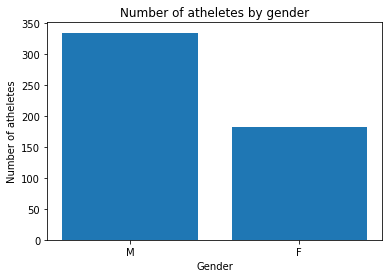

In [31]:
query = '''
SELECT COUNT(*), gender
FROM annp_final.athlete
GROUP BY gender
'''

res, cols = run_query(query)

xx = list(map(lambda x: x[1], res))
yy = list(map(lambda x: x[0], res))

plt.title('Number of athletes by gender')
plt.xlabel('Gender')
plt.ylabel('Number of athletes')
plt.bar(xx, yy)

plt.savefig('plots/athletesbygender.png')